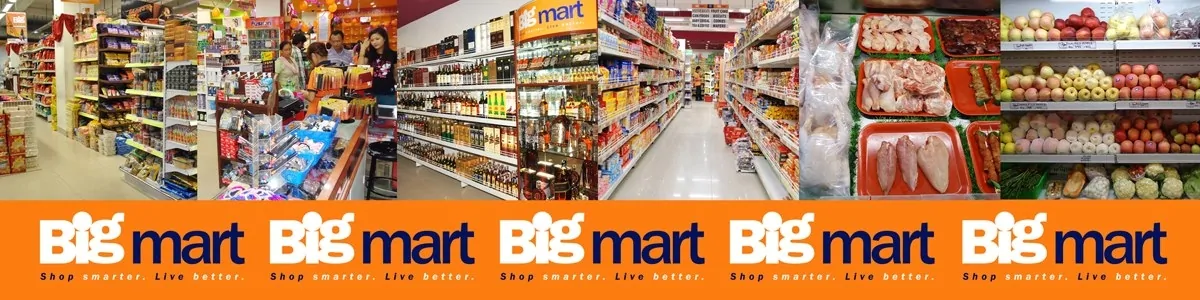

# Imports

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

# Mounted Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Raw data

In [197]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# NaN replaced with "None"
Now the data with ***NaN*** is gone and replaced with ***none*** for future work
<3


In [198]:
df.fillna("None", inplace=True)

In [199]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800


#Renaming the Data!
To avoid a mess up, I label each one with the exact name to represent the info given!

In [200]:
df.rename(columns = {'Item_Identifier': 'ItemID'}, inplace = True)
df.rename(columns = {'Item_Weight': 'ItemWeight'}, inplace = True)
df.rename(columns = {'Item_Fat_Content': 'ItemFatC'}, inplace = True)
df.rename(columns = {'Item_Visibility': 'ItemVis'}, inplace = True)
df.rename(columns = {'Item_Type': 'ItemType'}, inplace = True)
df.rename(columns = {'Item_MRP': 'ItemMRP'}, inplace = True)
df.rename(columns = {'Outlet_Identifier': 'OutletId'}, inplace = True)
df.rename(columns = {'Outlet_Establishment_Year': 'OutletYear'}, inplace = True)
df.rename(columns = {'Outlet_Size': 'OutletSize'}, inplace = True)
df.rename(columns = {'Outlet_Location_Type': 'OutletLocation'}, inplace = True)
df.rename(columns = {'Outlet_Type': 'OutletType'}, inplace = True)
df.rename(columns = {'Item_Outlet_Sales': 'OutletSales'}, inplace = True)


In [201]:
df.head(6)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


#Grouping By The Years
Grouping this data allows us to get a better idea of the sales for each year!
Lets take a deep look at the year : 1998

1998 - events: 
  

1. **Dow Jones drops over 500 points on August 31st on the New York Stock Exchange**
2. **Forest Fires in Florida force 120,000 to flee their homes**
3. **Tornadoes in central Florida destroy or damage 2,600 structures and kill 42**
4. **President Bill Clinton Impeached for perjury and obstruction of justice.**

As we can see there were a number of events to happen in the USA to count for the decrease sales in year of 1998. Which was then followed by 1999, in which the Dow Jones Industrial Average closes above 11,000 for the first time in history. Speaking of history things that happens in the world impact the overall market and will without a doubt impact the sales of this company. All that we can do in this regards is plan ahead and make a business plan for the these times, so that we can stay consistent thru these periods of up's and downs! 

*(**Refer to the Chart and PieChart below to get a better idea of the changes**)*





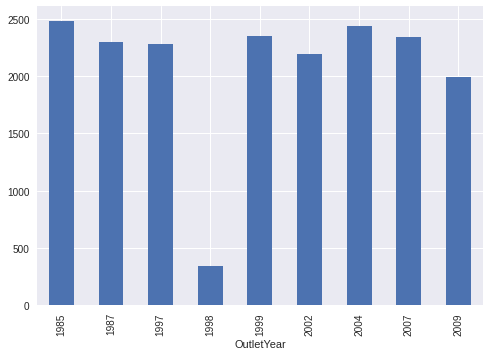

In [202]:
df.groupby("OutletYear")['OutletSales'].mean().plot(kind='bar');
#This shows the Data by Sales to years or years to sales, but we can get more!

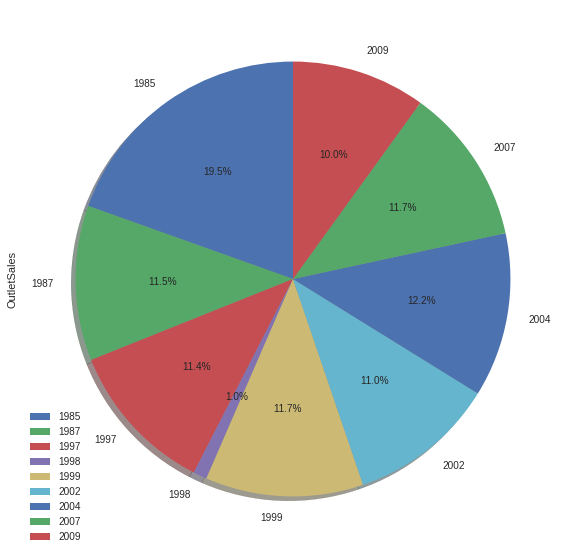

In [203]:

df.groupby(['OutletYear']).sum().plot(kind='pie',y='OutletSales', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%');


#Scores For The Type Of Markets!
The piechart below is showing the difference between the tiers/Locations and the Types of markets, which include *(**Grocery store, and supermarket**)* 

Please note that other smaller versions of stores will not be including in the graphing data for the time being, since these two type of stores are the primary focus of this company as a whole.

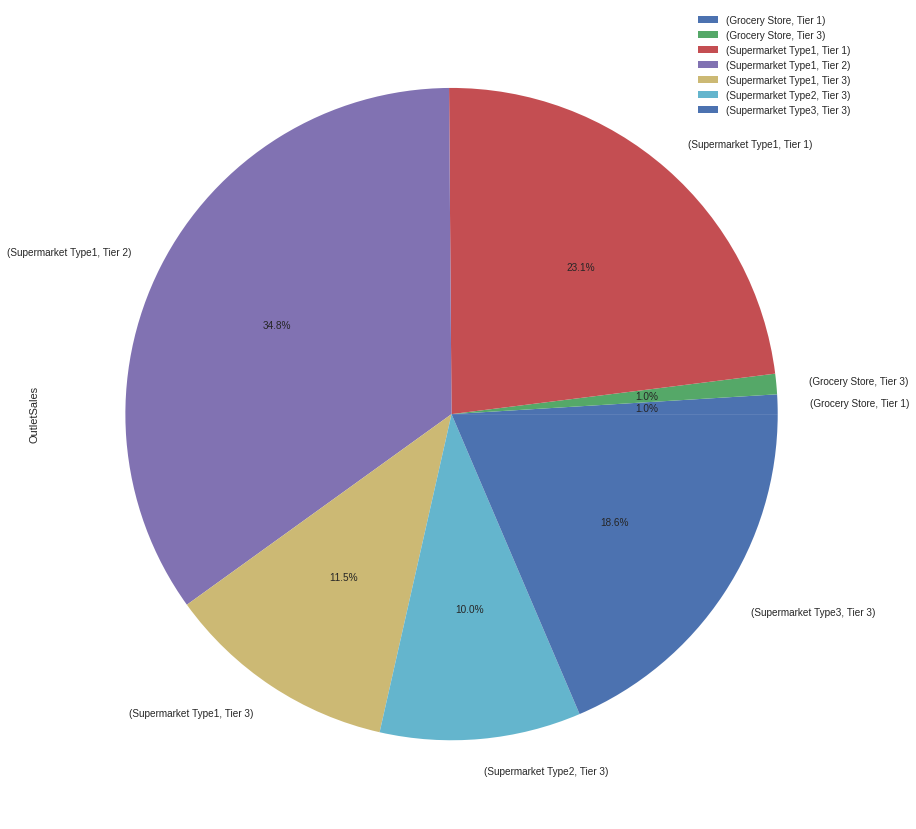

In [204]:
df.groupby(['OutletType','OutletLocation']).sum().plot(kind='pie', y='OutletSales', figsize=(15,15), autopct='%1.1f%%');
#This Pie chart shows the type of markets and what percentage of sales they had and includes their tier

#Number of Each Food Sold
This bar chart will show the differences between the type of items sold at the markets, and show the overall number of each item sold for all the markets listed above, under this company!


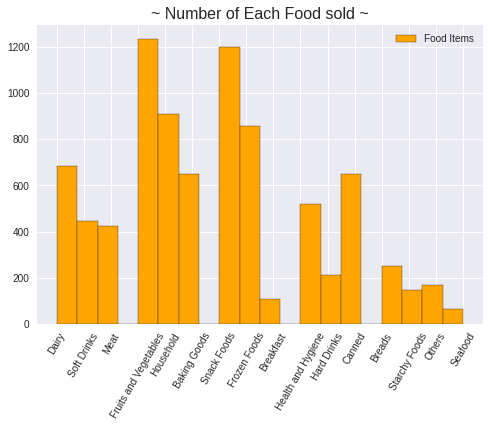

In [205]:
plt.style.use('seaborn')
df['ItemType'].hist(bins = 20,
  edgecolor='black', label='Food Items', color='orange');
plt.xticks(rotation = 60);
plt.title('~ Number of Each Food sold ~', fontsize = 16);
plt.legend();

In [206]:
df.info

<bound method DataFrame.info of      ItemID ItemWeight ItemFatC  ...  OutletLocation         OutletType  OutletSales
0     FDA15        9.3  Low Fat  ...          Tier 1  Supermarket Type1    3735.1380
1     DRC01       5.92  Regular  ...          Tier 3  Supermarket Type2     443.4228
2     FDN15       17.5  Low Fat  ...          Tier 1  Supermarket Type1    2097.2700
3     FDX07       19.2  Regular  ...          Tier 3      Grocery Store     732.3800
4     NCD19       8.93  Low Fat  ...          Tier 3  Supermarket Type1     994.7052
...     ...        ...      ...  ...             ...                ...          ...
8518  FDF22      6.865  Low Fat  ...          Tier 3  Supermarket Type1    2778.3834
8519  FDS36       8.38  Regular  ...          Tier 2  Supermarket Type1     549.2850
8520  NCJ29       10.6  Low Fat  ...          Tier 2  Supermarket Type1    1193.1136
8521  FDN46       7.21  Regular  ...          Tier 3  Supermarket Type2    1845.5976
8522  DRG01       14.8  Low Fat  